# Preliminary data analysis

See: https://ac209a-alzheimersproject.github.io/alzheimers-project/eda.html

### Evolution of the diagnosis

In [8]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib as plt
from pySankey.sankey import sankey
import seaborn as sns


In [2]:
merge = pd.read_csv("../data/ADNIMERGE.csv", low_memory=False)

In [3]:
firstvisits = ~merge.duplicated(subset=['PTID'], keep='first')
lastvisits = ~merge.duplicated(subset=['PTID'], keep='last')

first = merge.loc[firstvisits]
first = pd.concat([first['DX'], first['PTID']], axis=1)
last = merge.loc[lastvisits]
last = pd.concat([last['DX'], last['PTID']], axis=1)
last.rename(columns={"DX": "DX_f"}, inplace=True)

In [4]:
last.head()

,DX_f,PTID
63,MCI,067_S_0038
76,CN,100_S_5280
77,CN,082_S_5279
131,MCI,099_S_0060
208,MCI,018_S_0087


In [5]:
evol = first.merge(last, left_on='PTID', right_on='PTID').dropna()
evol

,DX,PTID,DX_f
0,CN,011_S_0002,MCI
5,Dementia,022_S_0007,Dementia
8,CN,100_S_0015,MCI
10,CN,011_S_0021,CN
11,CN,011_S_0023,CN
...,...,...,...
2420,CN,033_S_7100,CN
2421,CN,016_S_6892,CN
2422,CN,035_S_7076,CN
2423,CN,011_S_7089,CN


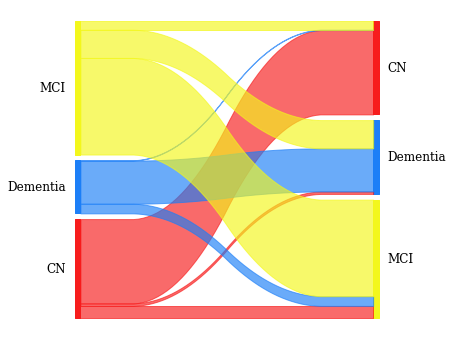

In [13]:
colors = {
    "Dementia": "#1b7ef7",
    "CN": "#f71b1b",
    "MCI": "#f3f71b",
    "SMC": "#12e23f",
    "EMCI": "#f78c1b"
}

sankey(evol['DX'], evol["DX_f"],  aspect=20, colorDict=colors, fontsize=12)

<AxesSubplot:xlabel='DX_f', ylabel='Density'>

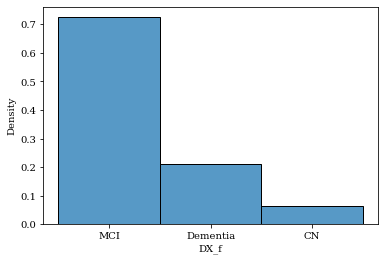

In [11]:
sns.histplot(evol[evol['DX'] == "MCI"]['DX_f'].astype(str), stat='density')

<AxesSubplot:xlabel='DX', ylabel='Density'>

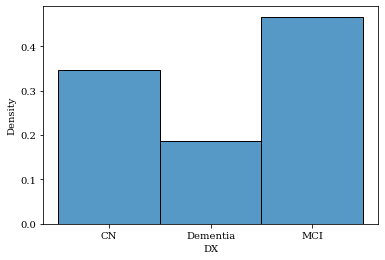

In [12]:
sns.histplot(evol["DX"].astype(str), stat='density')